## Atividade avaliativa exigida pela disciplina de programação de computadores

In [35]:
pip install matplotlib


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
import math

In [37]:
import matplotlib.pyplot as plt

## Função para popular variável em respeito aos dias

In [38]:

#populando o dicionario daily
def populateByDay(path):
    daily = {}
    with open(f'{path}') as f:
        for i in f:
            linha = i.rstrip().replace(' ', '').split(';')

            if(linha[0] in daily.keys()):
                if(linha[1] in daily[linha[0]].keys()):
                    daily[linha[0]][linha[1]][linha[2]] = {
                        'total':linha[4],
                        'std':linha[5],
                        'numberOfObservations':linha[6]
                    }
                else:
                    daily[linha[0]][linha[1]] = {}
                    daily[linha[0]][linha[1]][linha[2]] = {
                        'total':linha[4],
                        'std':linha[5],
                        'numberOfObservations':linha[6]
                    }
            else:
                daily[linha[0]] = {}
                daily[linha[0]][linha[1]] = {}
                daily[linha[0]][linha[1]][linha[2]] = {
                        'total':linha[4],
                        'std':linha[5],
                        'numberOfObservations':linha[6]
                    }
        
        return daily
            


## Função para popular variável por mês

In [39]:
#populando o dicionario monthly
def populateByMonth(path):
    monthly = {}
    with open(f'{path}') as f:
        for i in f:
            linha = i.rstrip().replace(' ', '').split(';')

            if(linha[0] in monthly.keys()):
                monthly[linha[0]][linha[1]] = {
                    'total': linha[3],
                    'std': linha[4],
                    'numberOfObservations':linha[5]
                }
            else:
                monthly[linha[0]] = {}
                monthly[linha[0]][linha[1]] = {
                    'total': linha[3],
                    'std': linha[4],
                    'numberOfObservations':linha[5]
                }
    return monthly

In [40]:
daily = populateByDay('./byDayCsv.csv')
monthly = populateByMonth('./byMonthCsv.csv')

## Função para contar dias sem manchas solares em determinado ano

In [41]:
def nonSpotInMonth(daily, year):
    if(year < 1818 or year > 2022):
        raise Exception('Year out of range. Try using years ranging from 1818 to 2022')
    else:
        year = daily[str(year)]
        values = {}
        count = 0

        for key, value in year.items():
            values[key] = {
                'totalDaysWithoutSpot':0
            }
            for keyDay, valueDay in value.items():
                if(valueDay['total'] == '0'):
                    values[key]['totalDaysWithoutSpot'] = values[key]['totalDaysWithoutSpot'] + 1
        return values
            
        

In [42]:
nonSpotInMonth(daily, 1818)

{'01': {'totalDaysWithoutSpot': 0},
 '02': {'totalDaysWithoutSpot': 6},
 '03': {'totalDaysWithoutSpot': 2},
 '04': {'totalDaysWithoutSpot': 0},
 '05': {'totalDaysWithoutSpot': 0},
 '06': {'totalDaysWithoutSpot': 0},
 '07': {'totalDaysWithoutSpot': 0},
 '08': {'totalDaysWithoutSpot': 0},
 '09': {'totalDaysWithoutSpot': 0},
 '10': {'totalDaysWithoutSpot': 0},
 '11': {'totalDaysWithoutSpot': 3},
 '12': {'totalDaysWithoutSpot': 3}}

## Função para contar ano e mês com mais dias sem manchas solares

In [43]:
def mostDaysWithoutSpot(daily):
    data = {
        'year': '',
        'month':'',
        'daysWithoutSpot': 0
    }
    count = 0
    month = ''
    for key, value in daily.items():
        for keyMonth, daysValues in value.items():
            for keyDay, dayValue in daysValues.items():
                if(dayValue['total'] == '0'):
                    count = count + 1
            if(data['daysWithoutSpot'] < count):
                data['month'] = keyMonth
                data['daysWithoutSpot'] = count
                data['year'] = key
                
            count = 0
    return data

In [44]:
mostDaysWithoutSpot(daily)

{'year': '1822', 'month': '01', 'daysWithoutSpot': 31}

## Função para determinar o ano e mês com mais dias com manchas solares

In [45]:
def mostDaysWithSpot(daily):
    data = {
        'year': '',
        'month':'',
        'daysWithSpot': 0,
        
    }
    count = 0
    month = ''
    for key, value in daily.items():
        for keyMonth, daysValues in value.items():
            for keyDay, dayValue in daysValues.items():
                if(dayValue['total'] != '0' and dayValue['total'] != '-1'):
                    count = count + 1
            if(data['daysWithSpot'] < count):
                data['month'] = keyMonth
                data['daysWithSpot'] = count
                data['year'] = key
            
            count = 0
    return data

In [46]:
mostDaysWithSpot(daily)

{'year': '1827', 'month': '07', 'daysWithSpot': 31}

## Função para determinar o ano, mês e dia com mais e menos manchas solares em um período dado

In [47]:
def maxMinByInterval(start, end, startMoth, endMonth, daily):
    maximum = {
        'year':0,
        'month':0,
        'day':0,
        'max':0
    }
    minimum = {
        'year':0,
        'month':0,
        'day':0,
        'minimum':999999999999
    }
    
    if(start >= 1818 and end <= 2022 and startMoth <= 12 and startMoth >= 1 and endMonth <= 12 and endMonth != 0):
        for i in range(start, end+1):
            year = daily[str(i)]
            for monthKey, monthValue in year.items():
                if((int(monthKey) == endMonth and i == end)):
                    break
                elif((int(monthKey) >= startMoth and i >= start) or (i > start)):
                    for dayKey, dayValue in monthValue.items():
                        if(int(dayValue['total']) > int(maximum['max'])):
                            maximum['year'] = str(i)
                            maximum['month'] = monthKey
                            maximum['day'] = dayKey
                            maximum['max'] = dayValue['total']
                        elif(int(dayValue['total']) < int(minimum['minimum'])):
                            minimum['year'] = str(i)
                            minimum['month'] = monthKey
                            minimum['day'] = dayKey
                            minimum['minimum'] = dayValue['total']
                        elif(endMonth == int(monthKey) and i == end):
                            break
                
        return {
            'maximum':maximum,
            'minimum':minimum
        }
    else:
        raise Exception('Error. Try using valid years and months (1818 to 2022, 1 to 12)')

In [48]:
maxMinByInterval(2000,2015,1,12,daily)

{'maximum': {'year': '2000', 'month': '07', 'day': '19', 'max': '353'},
 'minimum': {'year': '2004', 'month': '01', 'day': '27', 'minimum': '0'}}

## Duas funções diferentes. Uma pega a média pelo arquivo de médias, a segunda calcula pelos dias no arquivo de dias

In [49]:
def monthlyMeanByYear(monthly, year):
    means = {}
    if(str(year) in monthly.keys()):
        year = monthly[str(year)]
        for key, value in year.items():
            means[key] = value['total']
        return means
    else:
        raise Exception('Year out of range')

In [50]:
monthlyMeanByYear(monthly, 1818)

{'01': '58.1',
 '02': '37.4',
 '03': '42.4',
 '04': '57.5',
 '05': '88.5',
 '06': '60.8',
 '07': '46.8',
 '08': '52.6',
 '09': '43.4',
 '10': '52.8',
 '11': '18.3',
 '12': '43.0'}

In [51]:
def maxMeanByInterval(start, end, monthly):
    if(str(start) not in monthly.keys() or str(end) not in monthly.keys()):
        raise Exception('Years out of range')
    else:
        maximum = {
            'year':0,
            'month':0,
            'max':0
        }
        for i in range(start, end+1):
            data = monthlyMeanByYear(monthly, i)
            for key, value in data.items():
                if(float(value) > maximum['max']):
                    maximum['year'] = i
                    maximum['month'] = key
                    maximum['max'] = float(value)
        return maximum

In [52]:
maxMeanByInterval(2000, 2002, monthly)

{'year': 2000, 'month': '07', 'max': 244.3}

In [70]:
def minMeanByInterval(start, end, monthly):
    if(str(start) not in monthly.keys() or str(end) not in monthly.keys()):
        raise Exception('Years out of range')
    else:
        minimum = {
            'year':0,
            'month':0,
            'min':999999999
        }
        for i in range(start, end+1):
            data = monthlyMeanByYear(monthly, i)
            for key, value in data.items():
                if(float(value) < minimum['min']):
                    minimum['year'] = i
                    minimum['month'] = key
                    minimum['min'] = float(value)
        return minimum

In [71]:
minMeanByInterval(2000, 2002, monthly)

{'year': 2001, 'month': '02', 'min': 121.5}

In [53]:
def monthlyMeanByYearDay(daily, year):
    #pegar soma do total de manchas em um determinado mês e dividir pela quantidade de dias no mês
    #fazer isso para o restante dos meses
    if(str(year) in daily.keys()):
        year = daily[str(year)]
    
        totalDays = 0
        totalSpots = 0

        means = {}

        for monthKey, monthDays in year.items():
            for dayKey, dayValue in monthDays.items():
                if(dayValue['total'] != '-1'):
                    totalSpots = totalSpots + int(dayValue['total'])
                    totalDays = totalDays + 1
            means[monthKey] = totalSpots/totalDays
            totalDays = 0
            totalSpots = 0
        return means
    
    else:
        raise Exception('Year out of range')
    

In [54]:
monthlyMeanByYearDay(daily, 1818)

{'01': 58.125,
 '02': 37.42857142857143,
 '03': 42.357142857142854,
 '04': 57.523809523809526,
 '05': 88.48,
 '06': 60.8,
 '07': 46.76190476190476,
 '08': 52.55,
 '09': 43.388888888888886,
 '10': 52.77272727272727,
 '11': 18.333333333333332,
 '12': 43.0}

## Std by daily Observations

In [55]:
def stdByMothlyObservation(daily):
    std = {}
    
    nSigma = []
    n = 0
    
    
    
    for yearKey, yearMonth in daily.items():
        std[yearKey] = {}
        for monthKey, monthValue in yearMonth.items():
            
            for dayKey, dayValue in monthValue.items():
                nSigma.append(float(dayValue['numberOfObservations']) * (float(dayValue['std']) ** 2))
                n = n + int(dayValue['numberOfObservations'])
            if(n != 0):
                std[yearKey][monthKey] = {
                    'std':math.sqrt(sum(nSigma)/n)
                }
            else:
                std[yearKey][monthKey] = {
                    'std':-1
                }
                
            n = 0
            nSigma = []
    return std

In [56]:
stand = stdByMothlyObservation(daily)

## Pegar média suave em intervalo de anos

In [57]:
import itertools

In [58]:
def smoothedMeanByInterval(start, end, monthly):
    if(str(start) in monthly.keys() and str(end) in monthly.keys()):
        a = {}
    
        months = []

        means=[]

        result = {}

        years = list(monthly.keys())
        yearStart = int(years[0])
        yearEnd = int(years[len(years)-1])

        for key, value in monthly.items():
            if(int(key) >= start-1 and int(key) <= end+1):
                if(int(key) >= start and int(key) <= end):
                    result[key] = []
                for monthKey, monthValue in value.items():
                    #if(key in result.keys()):
                        #result[key][monthKey] = {
                            #'smoothedMean':0
                        #}
                    months.append(float(monthValue['total']))

        if(start > yearStart and end+1 == yearEnd):
            for i in range(12, len(months) -10):
                means.append((0.5*months[i-6] + months[i-5] + months[i-4] + months[i-3] + months[i-2] + months[i-1] + months[i] + months[i+1]+ months[i+2]+ months[i+3]+ months[i+4]+ months[i+5]+ months[i+6]*0.5)/12)
        elif(start > yearStart and end < yearEnd):
            for i in range(12, len(months) -12):
                means.append((0.5*months[i-6] + months[i-5] + months[i-4] + months[i-3] + months[i-2] + months[i-1] + months[i] + months[i+1]+ months[i+2]+ months[i+3]+ months[i+4]+ months[i+5]+ months[i+6]*0.5)/12)    
        elif(start == yearStart and end < yearEnd):
            for i in range(6, len(months) -12):
                means.append((0.5*months[i-6] + months[i-5] + months[i-4] + months[i-3] + months[i-2] + months[i-1] + months[i] + months[i+1]+ months[i+2]+ months[i+3]+ months[i+4]+ months[i+5]+ months[i+6]*0.5)/12)
        elif(start > yearStart and end == yearEnd):
            for i in range(12, len(months) -6):
                means.append((0.5*months[i-6] + months[i-5] + months[i-4] + months[i-3] + months[i-2] + months[i-1] + months[i] + months[i+1]+ months[i+2]+ months[i+3]+ months[i+4]+ months[i+5]+ months[i+6]*0.5)/12)
        else:
            for i in range(6, len(months) -6):
                means.append((0.5*months[i-6] + months[i-5] + months[i-4] + months[i-3] + months[i-2] + months[i-1] + months[i] + months[i+1]+ months[i+2]+ months[i+3]+ months[i+4]+ months[i+5]+ months[i+6]*0.5)/12)

       

        for key, value in result.items():
            if(int(key) == yearStart):
                for i in range(6, 12):
                    result[key].append(means.pop(0))
            elif(int(key) == yearEnd):
                for i in range(4):
                    result[key].append(means.pop(0))
            else:
                for i in range(12):
                    result[key].append(means.pop(0))
            #for monthKey, monthValue in value.items():
                #result[key][monthKey]['smoothedMean'] = means.pop(0)

        return result
    
    else:
        raise Exception('Years out of range')

In [59]:
means = smoothedMeanByInterval(1749,1760,monthly)

## Funções para arrecadar os dados e plotar o gráfico

In [60]:
def dataForGraph(daily, monthly, start, end):
    if(str(start) in daily.keys() and str(end) in daily.keys()):
        dayY = []
        monthY = []
        for key, value in daily.items():
            if(int(key) >= start and int(key) <= end):
                for monthKey, monthValue in value.items():
                    for dayKey, dayValue in monthValue.items():
                        dayY.append(int(dayValue['total']))



        for key, value in monthly.items():
            if(int(key) >= start and int(key) <= end):
                for monthKey, monthValue in value.items():
                    monthY.append(float(monthValue['total']))

        smoothed = smoothedMeanByInterval(start,end,monthly)
        smoothedY = []
        for key, value in smoothed.items():
            smoothedY.extend(value)

        return {
            'day':dayY,
            'month':monthY,
            'smoothed':smoothedY,
            'start':start,
            'end':end
        }
    else:
        raise Exception('Years out of range')

In [61]:
data = dataForGraph(daily, monthly, 2000, 2002)

In [62]:
def createGraph(data):
    fig, ax = plt.subplots()
    
    #creating first plot
    ax.set_aspect('auto')
    line1 = ax.plot(data['day'], linewidth=.2, color="y", label="Daily Observations")
    
    #ax.set_xticklabels(range(data['start'], data['end'], 5), rotation=90)
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_xticklabels([])
    #numTicks = math.floor((data['end'] - data['start'])/10)
    #ax.xaxis.set_major_locator(plt.MaxNLocator(numTicks))
    
    #ax.legend(loc=1)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    #creating second plot
    ax2 = ax.twiny()
    line2=ax2.plot(data['month'], linewidth=.5, color="b", label="Monthly Means")
    
    ax2.set_xticklabels([])
    
    
    
    #ax2.legend(loc=2)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    #creating third plot
    ax3 = ax2.twiny()
    line3=ax3.plot(data['smoothed'], linewidth=2, color="r", label="Smoothed mean")
    #period = [format(i) for i in range(data['start'], data['end'])]
    
    ax3.set_xticklabels([])
    
    ax3.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) 
    
    ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
    
    
    
    #criando legendas
    #ax3.legend(loc=2)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    lins = line1+line2+line3
    labs = [l.get_label() for l in lins]
    ax.legend(lins,labs,loc=0)
    
    plt.xticks(rotation=45)
    plt.show()

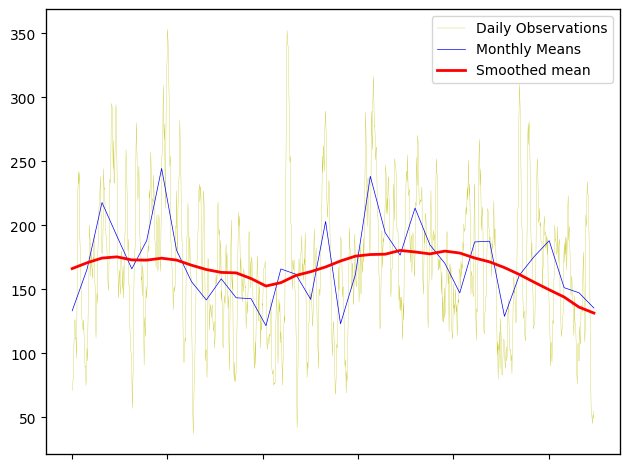

In [63]:
createGraph(data)